In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [0]:
m = pd.read_csv('mushrooms.csv')

Primeiros **renomeamos** as colunas para usá-las corretamente

In [0]:
m.columns = ['class_','cap_shape','cap_surface','cap_color','bruises','odor','gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape','stalk_root','stalk_surface_above_ring','stalk_surface_below_ring','stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color','ring_number','ring_type','spore_print_color','population','habitat']

In [0]:
m.head()

,class_,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


![alt text](https://i.imgur.com/lR4r819.jpg) 

*Dataset*:
https://www.kaggle.com/uciml/mushroom-classification

Vamos fazer algumas **correlações** das colunas com o *target* em *sns* primeiro: 

In [0]:
df_test = m

![alt text](https://i.imgur.com/XKxRjSE.jpg)

Bruises(**manchas**): bruises=t,no=f

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


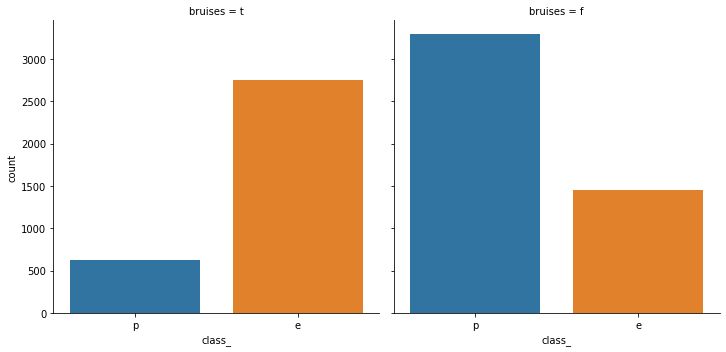

In [0]:
sns.factorplot(x = "class_", col = "bruises", kind = "count", data = df_test)

**odor**: almond=a,anise=l,creosote=c,fishy=y,**foul=f**,musty=m,**none=n** pungent=p,spicy=s

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


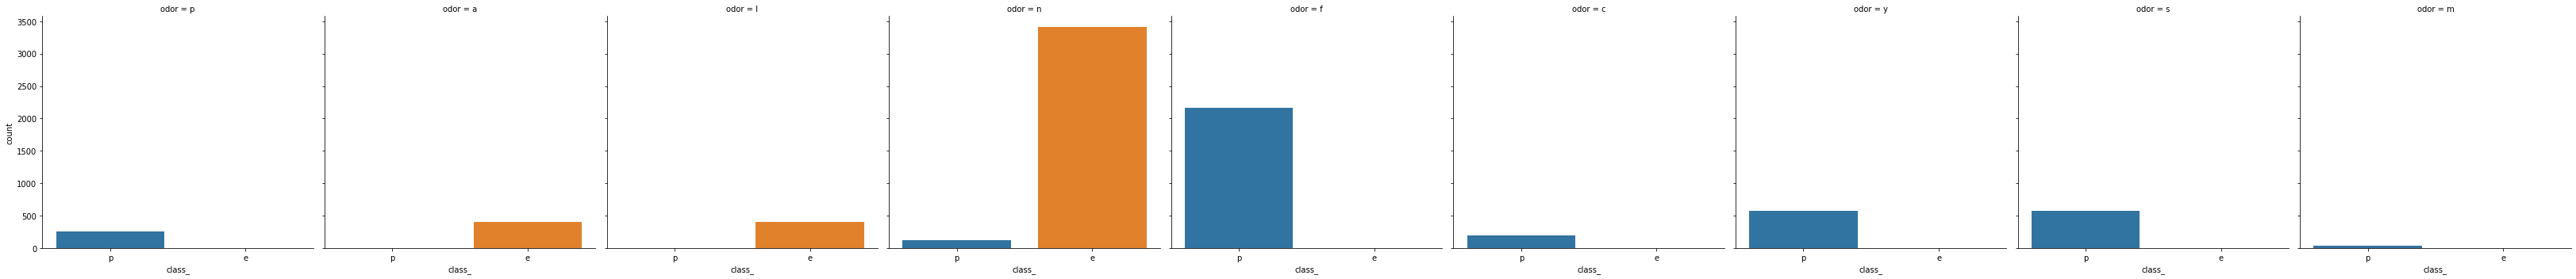

In [0]:
sns.factorplot(x = "class_", col = "odor", kind = "count", data = df_test)

![alt text](https://i.imgur.com/hvyX8Dk.jpg)

gill-color(**cor da base**): black=k,**brown=n**,**buff=b**,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


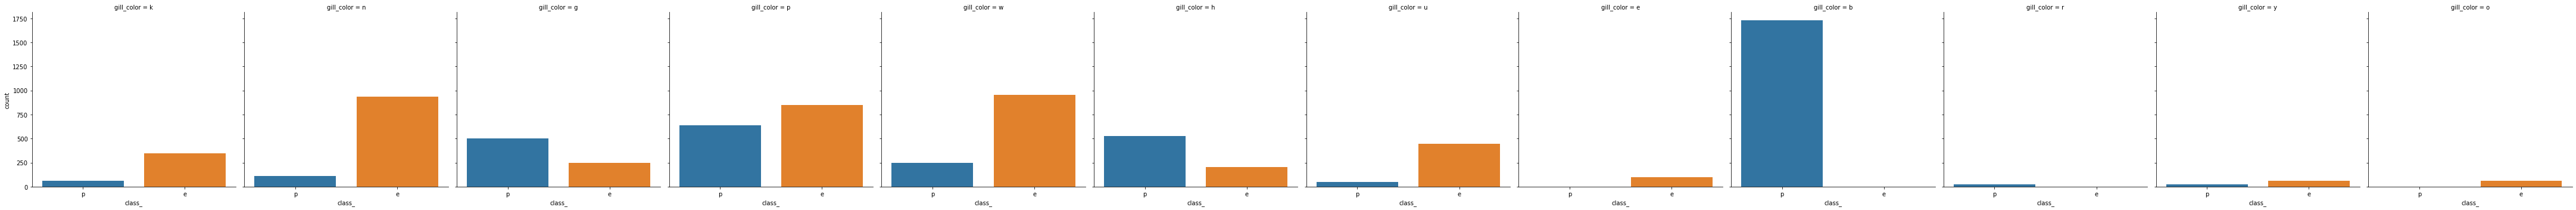

In [0]:
sns.factorplot(x = "class_", col = "gill_color", kind = "count", data = df_test)

![alt text](https://i.imgur.com/pp9z4Sl.jpg)

spore-print-color(**cor dos esporos**): **black=k**,**brown=n**,buff=b,**chocolate=h**,green=r,orange=o,purple=u,**white=w**,yellow=y

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


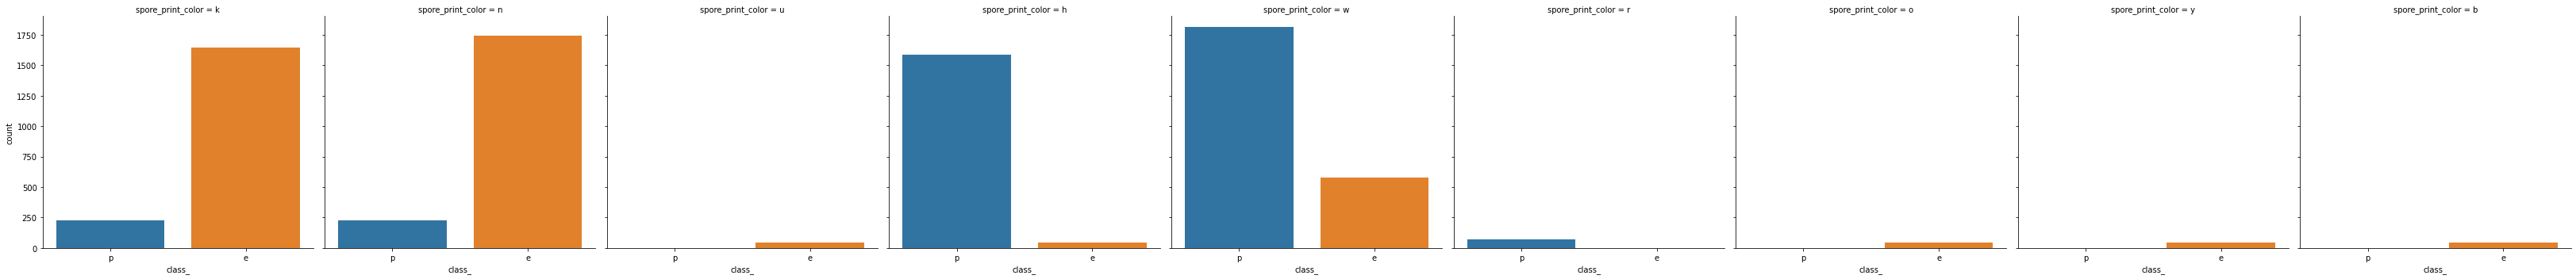

In [0]:
sns.factorplot(x = "class_", col = "spore_print_color", kind = "count", data = df_test)

***SCIKIT***

Devemos **alterar os dados** do *dataframe* para números, pois só deste modo conseguiremos usá-los no *scikit*

In [0]:
m.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


A primeira alternativa para resolver o problema seria usar a **função map com um dictionary**. Mas como temos um número consideravelmente alto de possibilidades de classificação juntando todas as colunas essa não é a melhor opção.

In [0]:
m1 = m

Para resolver esse problema aplicamos uma **função do sklearn** que serve justamente para isso



In [0]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for column in m1.columns:
    m1[column]=labelencoder.fit_transform(m1[column])

Os números não devem ser levados em conta como valores numéricos

In [0]:
m1.head()

,class_,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


O *loc* foi usado para separar os *features* das *labels*


In [0]:
X_m1 = m1.loc[: ,['cap_shape','cap_surface','cap_color','bruises','odor','gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape','stalk_root','stalk_surface_above_ring','stalk_surface_below_ring','stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color','ring_number','ring_type','spore_print_color','population','habitat']]
X_m1.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [0]:
y_m1 = m1.class_
y_m1.head()

0    1
1    0
2    0
3    1
4    0
Name: class_, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_m1, y_m1, random_state=42)

**Dividimos os dados** em teste treino para podermos treinar o modelo

In [0]:
from sklearn.naive_bayes import GaussianNB
model_bayes = GaussianNB()
model_bayes.fit(X_train, y_train)  

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
from sklearn.metrics import accuracy_score

y_model_bayes = model_bayes.predict(X_test)

accuracy_score(y_test, y_model_bayes)

0.9266371245691778

Importamos **confusion_matrix** para entender melhor os erros

In [0]:
from sklearn.metrics import confusion_matrix

mat_bayes = confusion_matrix(y_test, y_model_bayes) 

Text(83.40000000000006, 0.5, 'Valores Reais')

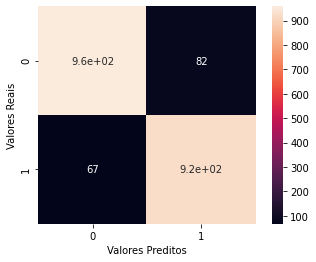

In [0]:
sns.heatmap(mat_bayes, square=True, annot = True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

In [0]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

In [0]:
y_model_tree = model_tree.predict(X_test)

accuracy_score(y_test, y_model_tree)

1.0

Text(83.40000000000006, 0.5, 'Valores Reais')

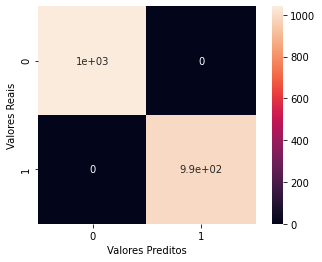

In [0]:
mat_tree = confusion_matrix(y_test, y_model_tree)
sns.heatmap(mat_tree, square=True, annot = True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

![alt text](https://i.imgur.com/aPL4haF.jpg)